In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
covid_19=pd.read_csv("https://raw.githubusercontent.com/umangkejriwal1122/Machine-Learning/master/Data%20Sets/covid_19_clean_complete.csv")

In [3]:
covid_19.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [4]:
covid_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27192 entries, 0 to 27191
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  8240 non-null   object 
 1   Country/Region  27192 non-null  object 
 2   Lat             27192 non-null  float64
 3   Long            27192 non-null  float64
 4   Date            27192 non-null  object 
 5   Confirmed       27192 non-null  int64  
 6   Deaths          27192 non-null  int64  
 7   Recovered       27192 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1.7+ MB


In [5]:
covid_19['Date']=pd.to_datetime(covid_19['Date'])
covid_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27192 entries, 0 to 27191
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  8240 non-null   object        
 1   Country/Region  27192 non-null  object        
 2   Lat             27192 non-null  float64       
 3   Long            27192 non-null  float64       
 4   Date            27192 non-null  datetime64[ns]
 5   Confirmed       27192 non-null  int64         
 6   Deaths          27192 non-null  int64         
 7   Recovered       27192 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 1.7+ MB


In [6]:
covid_19.drop(['Province/State'],axis=1,inplace=True)
covid_19.rename(columns={"Country/Region":"Country"},inplace=True)
covid_19.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [7]:
active=covid_19['Confirmed'] - covid_19['Deaths'] - covid_19['Recovered']
covid_19['Active']=active
covid_19.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0
1,Albania,41.1533,20.1683,2020-01-22,0,0,0,0
2,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0
3,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0
4,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0


# Prediction And Forecasting
forecasting -Data and time is involved

Time series analysis

we can have 2 column - 1 date and time  & 2 data

we  predict upcoming cases and time

we can apply when data is not constant (time series analysis)

when output is not following any function 


In [0]:
# fbProphet library (created by facebook for time series analysis)
# name of the column should be (ds & y)-predefined column in the library

In [0]:
from fbprophet import Prophet

In [10]:
# forecasting for confirmed cases
confirmed=covid_19.groupby('Date')['Confirmed'].sum().reset_index()
confirmed.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [0]:
confirmed.rename(columns={"Date":"ds","Confirmed":"y"},inplace=True)

In [12]:
confirmed.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


 Building the model

In [0]:
model=Prophet(interval_width=0.95) #interval_width is CI

TRAIN THE MODEL

In [14]:
model.fit(confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


future dates prediction 

In [15]:
future_dates=model.make_future_dataframe(periods=10)
future_dates.tail(10)

,ds
103,2020-05-04
104,2020-05-05
105,2020-05-06
106,2020-05-07
107,2020-05-08
108,2020-05-09
109,2020-05-10
110,2020-05-11
111,2020-05-12
112,2020-05-13


FORECASTING

In [16]:
forecast=model.predict(future_dates)
forecast.tail(7)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
106,2020-05-07,3.823797e+06,3.794770e+06,3.856464e+06,3.794406e+06,3.856220e+06,-941.732738,-941.732738,-941.732738,-941.732738,-941.732738,-941.732738,0.0,0.0,0.0,3.822856e+06
107,2020-05-08,3.903553e+06,3.865674e+06,3.952721e+06,3.865194e+06,3.946335e+06,3006.314530,3006.314530,3006.314530,3006.314530,3006.314530,3006.314530,0.0,0.0,0.0,3.906560e+06
108,2020-05-09,3.983309e+06,3.934315e+06,4.043902e+06,3.930892e+06,4.040313e+06,3151.748618,3151.748618,3151.748618,3151.748618,3151.748618,3151.748618,0.0,0.0,0.0,3.986461e+06
109,2020-05-10,4.063065e+06,4.000423e+06,4.132107e+06,3.998404e+06,4.131441e+06,2291.860599,2291.860599,2291.860599,2291.860599,2291.860599,2291.860599,0.0,0.0,0.0,4.065357e+06
110,2020-05-11,4.142821e+06,4.062594e+06,4.222004e+06,4.062275e+06,4.222148e+06,-791.500022,-791.500022,-791.500022,-791.500022,-791.500022,-791.500022,0.0,0.0,0.0,4.142030e+06
111,2020-05-12,4.222577e+06,4.125277e+06,4.315819e+06,4.126979e+06,4.318533e+06,-2633.308226,-2633.308226,-2633.308226,-2633.308226,-2633.308226,-2633.308226,0.0,0.0,0.0,4.219944e+06
112,2020-05-13,4.302333e+06,4.187323e+06,4.411759e+06,4.191728e+06,4.419133e+06,-4083.382762,-4083.382762,-4083.382762,-4083.382762,-4083.382762,-4083.382762,0.0,0.0,0.0,4.298250e+06


yhat=predicted value

yhat_lower=lower value of prediction

yhat_upper=upper value of prediction

In [17]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
106,2020-05-07,3.822856e+06,3.794770e+06,3.856464e+06
107,2020-05-08,3.906560e+06,3.865674e+06,3.952721e+06
108,2020-05-09,3.986461e+06,3.934315e+06,4.043902e+06
109,2020-05-10,4.065357e+06,4.000423e+06,4.132107e+06
110,2020-05-11,4.142030e+06,4.062594e+06,4.222004e+06
111,2020-05-12,4.219944e+06,4.125277e+06,4.315819e+06
112,2020-05-13,4.298250e+06,4.187323e+06,4.411759e+06


PLOT VALUES

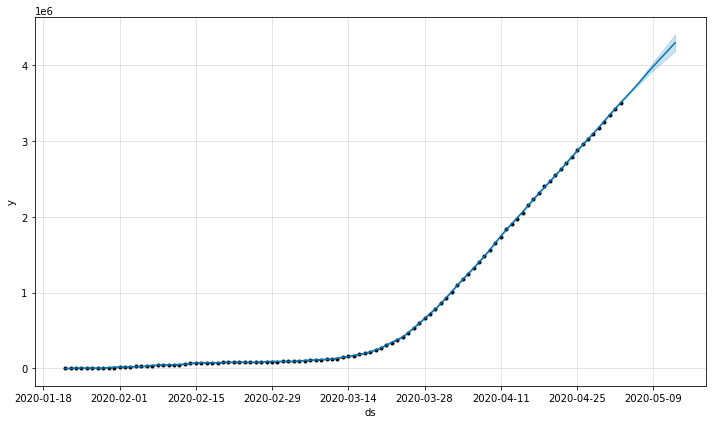

In [18]:
confirmed_plot=model.plot(forecast)

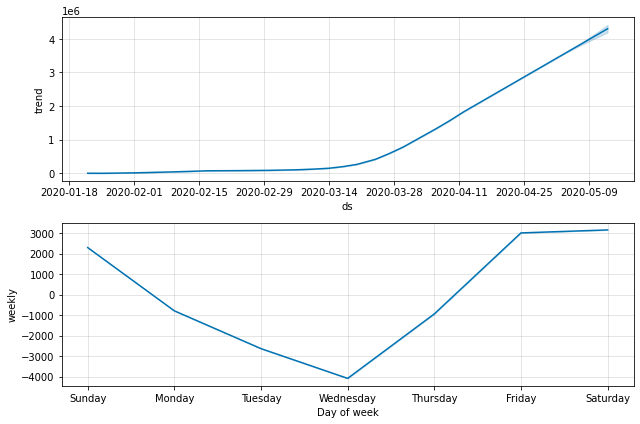

In [19]:
weekly_plot = model.plot_components(forecast)

For China

In [0]:
china=covid_19[covid_19['Country']=='China']

In [21]:
china.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
49,China,31.8257,117.2264,2020-01-22,1,0,0,1
50,China,40.1824,116.4142,2020-01-22,14,0,0,14
51,China,30.0572,107.8740,2020-01-22,6,0,0,6
52,China,26.0789,117.9874,2020-01-22,1,0,0,1
53,China,37.8099,101.0583,2020-01-22,0,0,0,0


In [22]:
# forecasting for confirmed cases
china_forcast=china.groupby('Date')['Active'].sum().reset_index()
china_forcast.head()

,Date,Active
0,2020-01-22,503
1,2020-01-23,595
2,2020-01-24,859
3,2020-01-25,1326
4,2020-01-26,1971


In [23]:
china_forcast.rename(columns={"Date":"ds","Active":"y"},inplace=True)
china_forcast.tail(10)

,ds,y
93,2020-04-24,3654
94,2020-04-25,3602
95,2020-04-26,3557
96,2020-04-27,3509
97,2020-04-28,3487
98,2020-04-29,3452
99,2020-04-30,3417
100,2020-05-01,3401
101,2020-05-02,3387
102,2020-05-03,3350


In [24]:
model=Prophet(interval_width=0.95) #interval_width is CI
model.fit(china_forcast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
future_dates=model.make_future_dataframe(periods=10)
future_dates.tail(10)

,ds
103,2020-05-04
104,2020-05-05
105,2020-05-06
106,2020-05-07
107,2020-05-08
108,2020-05-09
109,2020-05-10
110,2020-05-11
111,2020-05-12
112,2020-05-13


In [26]:
forecast=model.predict(future_dates)
forecast.tail(7)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
106,2020-05-07,152.827274,-28829.012282,28186.081646,66.111734,248.455370,-374.171709,-374.171709,-374.171709,-374.171709,-374.171709,-374.171709,0.0,0.0,0.0,-221.344435
107,2020-05-08,-202.323484,-28446.128045,26717.063253,-331.505712,-67.603858,33.024546,33.024546,33.024546,33.024546,33.024546,33.024546,0.0,0.0,0.0,-169.298938
108,2020-05-09,-557.474243,-28423.605362,27297.545392,-730.012498,-386.801858,34.815362,34.815362,34.815362,34.815362,34.815362,34.815362,0.0,0.0,0.0,-522.658880
109,2020-05-10,-912.625001,-29346.036767,28345.331524,-1133.493846,-698.817845,387.498328,387.498328,387.498328,387.498328,387.498328,387.498328,0.0,0.0,0.0,-525.126673
110,2020-05-11,-1267.775759,-29569.175762,26888.207107,-1524.960021,-1017.160550,420.599889,420.599889,420.599889,420.599889,420.599889,420.599889,0.0,0.0,0.0,-847.175870
111,2020-05-12,-1622.926517,-29687.704719,27666.757858,-1948.594420,-1333.144069,688.883354,688.883354,688.883354,688.883354,688.883354,688.883354,0.0,0.0,0.0,-934.043163
112,2020-05-13,-1978.077275,-30707.646109,23534.232617,-2354.036343,-1634.059822,-1190.649771,-1190.649771,-1190.649771,-1190.649771,-1190.649771,-1190.649771,0.0,0.0,0.0,-3168.727046


In [27]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
106,2020-05-07,-221.344435,-28829.012282,28186.081646
107,2020-05-08,-169.298938,-28446.128045,26717.063253
108,2020-05-09,-522.658880,-28423.605362,27297.545392
109,2020-05-10,-525.126673,-29346.036767,28345.331524
110,2020-05-11,-847.175870,-29569.175762,26888.207107
111,2020-05-12,-934.043163,-29687.704719,27666.757858
112,2020-05-13,-3168.727046,-30707.646109,23534.232617


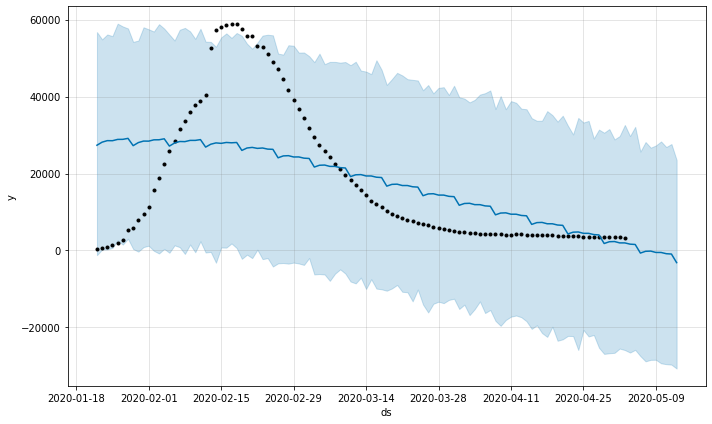

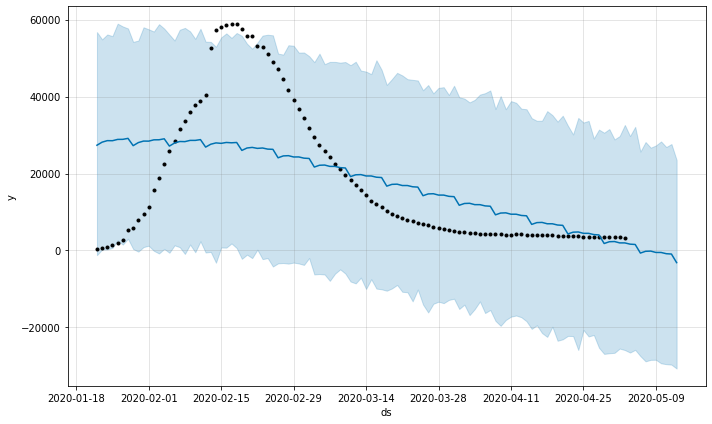

In [28]:
model.plot(forecast)

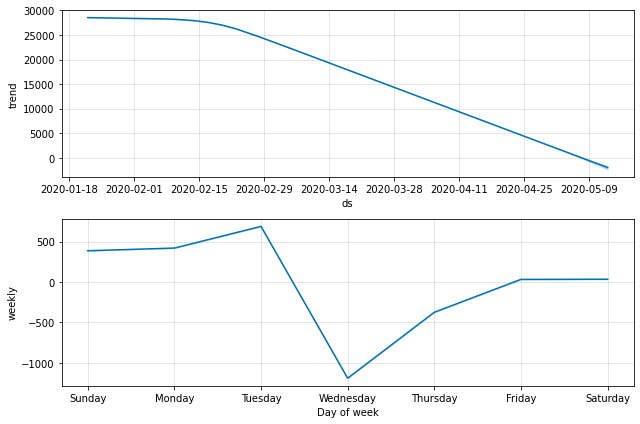

In [29]:
weekly_plot = model.plot_components(forecast)